<a href="https://colab.research.google.com/github/vikasgandhavliya/vikasgandhavliya/blob/main/Wine_dataset_T_SNE_AND_SVD_%2CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{Mandatory Key steps:}$

1. Loading the data set.
2. Feature Scaling of Dataset using StandardScaler function in scikit learn for Standardisation.
3. Use TruncatedSVD & PCA function in scikit learn to apply SVD & PCA for dimensionality reduction of iris dataset respectively.
4. Fit and transform the data set.
5. Visualize the reduced data using Matplotlib library to mark the difference between SVD, PCA on iris dataset.
5. Investigate U, Σ and V matrices
6. Finding the best rank for the given data set using Frobenius Norm



#Import libraries and load dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_wine
%matplotlib inline
from numpy import diag

In [ ]:
data=load_wine()

In [ ]:
old_data=data
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
df1=pd.DataFrame(data.data,columns=data['feature_names'])

In [ ]:
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
new_data=df1

In [ ]:
df1.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
 df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df1.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [ ]:
df1.info

<bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  no

In [ ]:
df2=pd.DataFrame(data.target,columns=['target'])

In [ ]:
df2

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


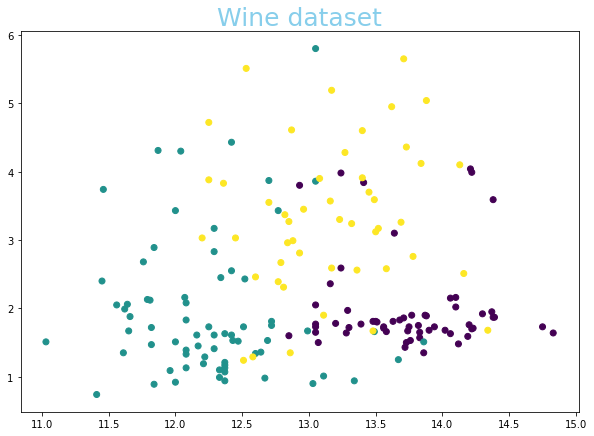

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(label='Wine dataset',fontsize=25,color="skyblue")
plt.scatter(df1['alcohol'],df1['malic_acid'],c=df2['target'])

# Feature scaling of dataset by using StandardScaller

In [ ]:
# #Standardizing
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df1=scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in df1.columns:
  y=np.array(df1[i]).reshape(-1,1)
  df1[i]=sc.fit_transform(y)

In [ ]:
df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
df1.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


# Using SVD

In [ ]:
svd = TruncatedSVD(n_components=2)
result= svd.fit_transform(new_data)
print(result[0:5])

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]]


In [ ]:
r=pd.DataFrame(result,columns=['s1','s2'])
r.head()

,s1,s2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


#Using PCA

In [ ]:
pca = PCA(n_components=2)
result_pca = pca.fit_transform(df1)
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)
sum(explained_variance*100)

[36.1988481  19.20749026]


55.40633835693532

In [ ]:
p=pd.DataFrame(result_pca,columns=['pc1','pc2'])
p.head()

,pc1,pc2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [ ]:
# visualize a minmax scaler transform of the wine_dataset
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load dataset
from sklearn.datasets import load_wine
# retrieve just the numeric input values
#data =data.values[:, :-1]

# Visualization of SVD and PCA Result

Text(0.5, 1.0, 'Relation between 1st and 2nd component of PCA')

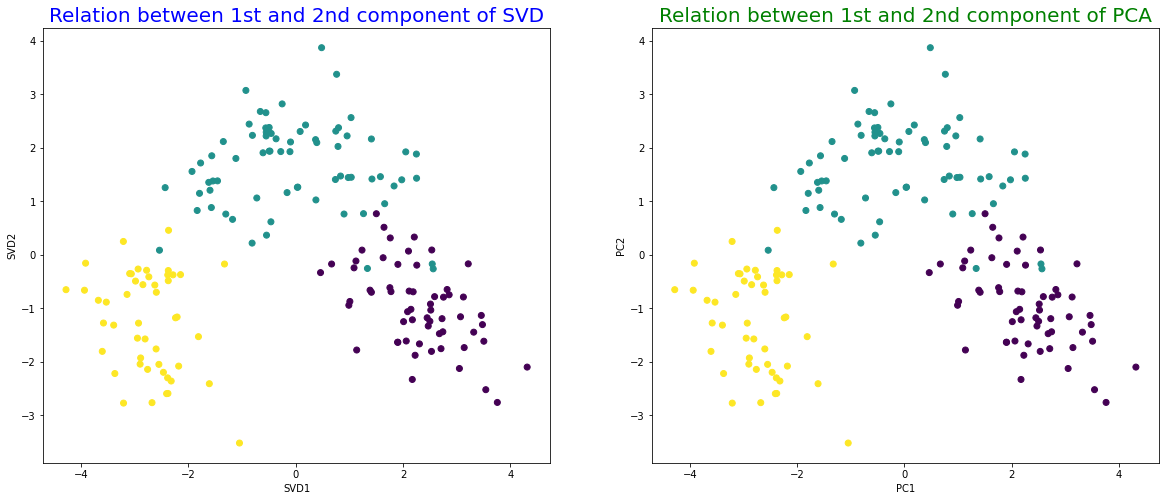

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(r['s1'],r['s2'],c=df2['target'])
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title(label='Relation between 1st and 2nd component of SVD',fontsize=20,color="blue")
plt.subplot(1, 2, 2)
plt.scatter(p['pc1'],p['pc2'],c=df2['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(label='Relation between 1st and 2nd component of PCA',fontsize=20,color="green")

## Conclussion:- Both of SVD and PCA performed similar decomposition for given dataset and there is no difference in values after dimension reduction techniques

Text(0.5, 1.0, 'Scree plot')

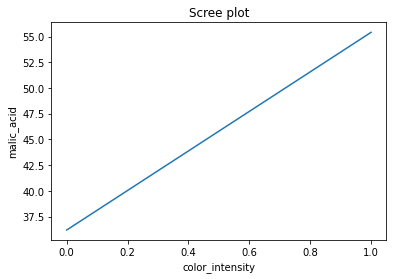

In [ ]:
Variance_Explaied=np.cumsum(np.round(pca.explained_variance_ratio_, decimals
=11)*100) # cummilative variance
plt.plot(Variance_Explaied)
plt.xlabel('color_intensity')
plt.ylabel('malic_acid')
plt.title('Scree plot')

In [ ]:
X = df1.iloc[:, 1:20].values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#Using SVD and U,V,and Sigma 

In [ ]:
svd = TruncatedSVD(n_components =4)
result= svd.fit_transform(df1)
print(result)
result_svd = svd.fit_transform(df1)
explained_variance = svd.explained_variance_ratio_
print(explained_variance*100)
sum(explained_variance*100)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 -2.15631188e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 -2.91358318e-01]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01  7.24902309e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01  5.67983308e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00 -4.09765788e-01]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01 -5.15637495e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01 -6.58305046e-02]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01 -1.19260801e+00]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00  5.62703612e-02]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01  3.49381568e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01  2.68417600e-02]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00 -8.90164338e-01]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01 -3.56438010e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00  1.62458063e-01]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00  3.05773190e

73.59899907589934

In [ ]:
X.shape

(178, 12)

In [ ]:
X

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
df1 = asarray([[1,100],
				[1, 20],
				[50, 500],
				[80, 700],
				[100, 1000]])
print(df1)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df1)
print(scaled)

[[   1  100]
 [   1   20]
 [  50  500]
 [  80  700]
 [ 100 1000]]
[[0.         0.08163265]
 [0.         0.        ]
 [0.49494949 0.48979592]
 [0.7979798  0.69387755]
 [1.         1.        ]]


In [ ]:
# visualize a minmax scaler transform of the wine_dataset
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load dataset
from sklearn.datasets import load_wine
# retrieve just the numeric input values
#data =data.values[:, :-1]

In [ ]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
df1 = trans.fit_transform(df1)
# convert the array back to a dataframe
df1 = DataFrame(df1)
# summarize
print(df1.describe())


              0         1
count  5.000000  5.000000
mean   0.458586  0.453061
std    0.455588  0.418840
min    0.000000  0.000000
25%    0.000000  0.081633
50%    0.494949  0.489796
75%    0.797980  0.693878
max    1.000000  1.000000


In [ ]:
# svd = TruncatedSVD(n_components =4)
# result= svd.fit_transform(X)
# print(result)

In [ ]:
from numpy import diag
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd

In [ ]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
df1 = trans.fit_transform(df1)
# convert the array back to a dataframe
df1 = DataFrame(df1)
# summarize
print(df1.describe())

              0         1
count  5.000000  5.000000
mean   0.458586  0.453061
std    0.455588  0.418840
min    0.000000  0.000000
25%    0.000000  0.081633
50%    0.494949  0.489796
75%    0.797980  0.693878
max    1.000000  1.000000


In [ ]:
svd = TruncatedSVD(n_components =4)
result= svd.fit_transform(X)
print(result)
result_svd = svd.fit_transform(new_data)
explained_variance = svd.explained_variance_ratio_
print(explained_variance*100)
sum(explained_variance*100)

[[-3.07857252e+00 -1.21926180e+00 -3.88069767e-01 -2.39523061e-01]
 [-2.19079587e+00  6.64568240e-01 -1.92210947e+00 -2.91410650e-01]
 [-2.45644079e+00 -1.50581110e+00  5.56489034e-01  7.23595832e-01]
 [-3.42275012e+00 -2.55605831e+00 -7.03345739e-01  5.64575214e-01]
 [-9.48975875e-01 -1.32973488e+00  1.76063170e+00 -4.11976922e-01]
 [-2.76731538e+00 -1.77985016e+00 -9.44531169e-01 -5.06330177e-01]
 [-2.18375478e+00 -4.58036710e-01 -8.05131410e-01 -2.80189959e-02]
 [-1.82632140e+00 -1.33985744e+00 -2.81585363e-03 -1.18965608e+00]
 [-2.19383381e+00  2.03202783e-01 -1.37391008e+00  9.22449832e-02]
 [-2.59000186e+00 -4.35609334e-01 -1.00682982e+00  3.59339550e-01]
 [-3.26089058e+00 -1.03803643e+00 -5.51904036e-01  3.52510697e-02]
 [-1.55488981e+00  1.04878503e-01 -9.22660838e-01 -8.60139822e-01]
 [-1.96567565e+00 -2.73148206e-01 -7.68037835e-01 -3.18624868e-01]
 [-3.14743458e+00 -2.58202082e-01 -9.02256787e-01  2.29520183e-01]
 [-4.00629989e+00 -1.65773346e+00 -1.56480932e+00  3.21571938e

73.59899907589931

In [ ]:
s= diag(svd.singular_values_)
new_data = np.dot(result, right_matrix)
new_data = np.round(new_data,2)
print(new_data)
print(df1.values)

NameError: ignored

In [ ]:
sigma= svd.singular_values_
left_matrix= result/svd.singular_values_
right_matrix = svd.components_
print(sigma)
print(left_matrix)
print(right_matrix)
print(sigma.shape)
print(left_matrix.shape)
print(right_matrix.shape)

In [ ]:
import numpy as np
help(np.round)

In [ ]:
# svd = TruncatedSVD(n_components =4)
# result= svd.fit_transform(X)
# print(result)
# result_svd = svd.fit_transform(new_data)
# explained_variance = svd.explained_variance_ratio_
# print(explained_variance*100)
# sum(explained_variance*100)

# Using T-SNE model

In [ ]:
# loading TSNE model from Sklearn
from sklearn.manifold import TSNE

In [ ]:
# Using TSNE to reduce to 2 features as indicated by first argument
tsne = TSNE(n_components=2)
# transforming the data set to 2 dimensions
New_points = tsne.fit_transform(df1.iloc[:,0:11])
# creating dataframe of new transformed data points in two features
Tsne_points =pd.DataFrame(New_points, columns= ['color_intensity',	'magnesium']
                         )
# concatinating data frame with class labels in original data set
# Tsne_model = pd.concat([Tsne_points,data.iloc[:,11]], axis = 1)

# printing the new data set

print(Tsne_points)